# TPM034A Machine Learning for socio-technical systems 
## `Mini-project #2: Predicting Innovative Outcomes of Applied Research Projects in the NL`

**Delft University of Technology**<br>
**Q2 2023**<br>
**Module manager:** Dr. Sander van Cranenburgh <br>
**Instructors:** Dr. Sander van Cranenburgh, Dr. Giacomo Marangoni, Dr. Amir Pooyan Afghari <br>
**TAs:**  Francisco Garrido Valenzuela & Lucas Spierenburg <br>

## `Learning objectives:`
This mini-project addresses LO3, LO4, LO5 and LO6 in the course.

After the course, students can:
1. explain fundamental concepts of machine learning (ML).
2. conceptually explain the workings of a selected number of ML models and eXplainable AI (XAI) techniques, and apply these to empirical data.
3. **identify applications of ML and XAI techniques in real-world socio-technical systems**
4. **examine the impact of ML-based solutions and interventions on individuals, organisations, and society through XAI.**
5. **conduct an in-depth analysis of a real-world socio-technical challenge, by applying ML and XAI to empirical data.**
6. **reflect on the strengths and limitations of ML and XAI in real-world socio-technical systems.**

## `Project description` <br>

### **Introduction**
The Dutch government has an array of funding schemes available to foster knowledge production in the Netherlands. One of these schemes focuses on addressing the Dutch “knowledge paradox”: Despite the country’s strong science foundation, companies perform relatively weakly in research & development. The scheme addresses this issue by explicitly requiring funding applicants to set up a committee consisting of members from industry to discuss the potential applicability of (intermediate) findings and steer the research process. The underlying idea is that involving (potential) users like this will increase the likelihood of a project that generates innovative outcomes. However, considerable debate exists on how to organize such committees most effectively. Should members, for example, have a diverse technological background or not? Should the selection favour those project leaders who are more experienced? And what about the organization of the networks in which these projects become embedded because of inter-project links? 
The objective of this mini-project is to investigate whether a research project's innovative outcome can be predicted using data on the project network characteristics.

### **Data**
You have access to the following data:
1.	Project network characteristics for research projects in the Netherlands,
2.	The final innovative outcomes of projects based on the extent to which the project generated a product.
The file 'data descrition.pdf' provides a brief explanation of the data.

### **Tasks and grading**
There are 8 tasks in this project. In total, 10 points can be earned for these 8 tasks. The weight per task is shown below.

1.	**Data preparation**: prepare the data and separate training and testing data, handle the missing data, handle outliers [1 point]
2.	**Data discovery and visualisation**: investigate the distribution of variables, the correlation between variables, etc. [1 point]
3.	**Selection and application of a proper analytical technique**: create a regression or a machine learning model to predict the innovative outcome of the projects [1 point]
4.	**Model evaluation and output visualization**: evaluate the prediction ability of the selected model(s) [1 point]
5.	**Model explanation**: Identify top 5 features that have the most contribution to innovative outcome of the projects [1 point]
6.	Name two analytical strengths and two analytical limitations of your selected model and data to predict aggression levels [2 points]
7.	Discuss the societal impact of these analytical strengths and limitations on individuals, organisations, and society [2 points] 
8.	Propose a potential analytical solution (related to model or data) for mitigating the most severe limitation [1 point]



### **Grading criteria:**
For the first five tasks:
- Correctness of methods and techniques (45%)
- Completeness (45%)
- Coding skills (10%) 

For task 6, 7, 8:
- Depth of critical thinking and creativity (60%)
- Completeness (40%)


### **Submission**
When you finish the project, please submit the Jupyter Notebook file of your work to Brightspace and prepare a final presentation (including the results of the tasks) to be delivered on the presentations day.
This project is a group project and so each group must submit one Jupyter Notebook file. However, it is expected that all members of the group contribute to the project and so they all must participate in the final presentation.

The deadline for submission is **11/01/2024**.

# Group 5

### Install Requirements

In [1]:
#!pip install -r requirements.txt

### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ML model training
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## 1. Data Preparation

### Data loading

In [3]:
df = pd.read_csv("data/data.csv")
df.head()

,Project_id,project_outcomes,technoogical_field,year,network_density,network_degree_centralization,network_diameter,network_clustering,network_reach,research_location,technological_diversity,geographical_diversity,project_leader_experience,member_relational_experience,funds,project_joint_members
0,1,1,Life_Sciences,1989,0.2,0.29,6,0.62,26.66732,Wageningen Universiteit,0.357143,0.266667,1,0,225.97,0.18
1,2,0,Life_Sciences,1989,0.2,0.29,6,0.62,26.66732,Vrije Universiteit Amsterdam,0.428571,0.200000,0,0,545.00,0.16
2,3,1,Life_Sciences,1989,0.2,0.29,6,0.62,26.66732,Wageningen Universiteit,1.000000,1.000000,0,0,262.36,0.08
3,4,1,Life_Sciences,1989,0.2,0.29,6,0.62,26.66732,Wageningen Universiteit,0.214286,0.266667,0,0,477.71,0.18
4,5,1,Life_Sciences,1989,0.2,0.29,6,0.62,26.66732,Vrije Universiteit Amsterdam,1.000000,0.000000,0,0,496.10,0.30


### Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Project_id                     555 non-null    int64  
 1   project_outcomes               555 non-null    int64  
 2   technoogical_field             555 non-null    object 
 3   year                           555 non-null    int64  
 4   network_density                555 non-null    float64
 5   network_degree_centralization  555 non-null    float64
 6   network_diameter               555 non-null    int64  
 7   network_clustering             555 non-null    float64
 8   network_reach                  555 non-null    float64
 9   research_location              555 non-null    object 
 10  technological_diversity        555 non-null    float64
 11  geographical_diversity         555 non-null    float64
 12  project_leader_experience      555 non-null    int

### Convert categorical variables to numerical ones

In [5]:
categorical_cols = ["technoogical_field", "research_location"]
df_numerical = pd.get_dummies(df, columns=categorical_cols).astype(float)

# Rename columns

new_col_names = []
for col in df_numerical.columns:
    if any(sub in col for sub in categorical_cols):
        new_col_names.append(col.split("_")[-1].replace(" ", "_"))
    else:
        new_col_names.append(col)
df_numerical.columns = new_col_names
df_numerical.head()

,Project_id,project_outcomes,year,network_density,network_degree_centralization,network_diameter,network_clustering,network_reach,technological_diversity,geographical_diversity,...,Rijksuniversiteit_Groningen,Technische_Universiteit_Delft,Technische_Universiteit_Eindhoven,Universiteit_Leiden,Universiteit_Twente,Universiteit_Utrecht,Universiteit_van_Amsterdam,Universiteit_van_Maastricht,Vrije_Universiteit_Amsterdam,Wageningen_Universiteit
0,1.0,1.0,1989.0,0.2,0.29,6.0,0.62,26.66732,0.357143,0.266667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,0.0,1989.0,0.2,0.29,6.0,0.62,26.66732,0.428571,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,1.0,1989.0,0.2,0.29,6.0,0.62,26.66732,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1989.0,0.2,0.29,6.0,0.62,26.66732,0.214286,0.266667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,1.0,1989.0,0.2,0.29,6.0,0.62,26.66732,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Drop non-relevant columns for model

In [6]:
model_df = df_numerical.drop(["Project_id"], axis=1)

## 2. Data Discovery and Visualisation

### Numerical column values summary

In [7]:
model_df.describe()

,project_outcomes,year,network_density,network_degree_centralization,network_diameter,network_clustering,network_reach,technological_diversity,geographical_diversity,project_leader_experience,...,Rijksuniversiteit_Groningen,Technische_Universiteit_Delft,Technische_Universiteit_Eindhoven,Universiteit_Leiden,Universiteit_Twente,Universiteit_Utrecht,Universiteit_van_Amsterdam,Universiteit_van_Maastricht,Vrije_Universiteit_Amsterdam,Wageningen_Universiteit
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,...,555.000000,555.000000,555.000000,555.000000,555.00000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,0.594595,1997.127928,0.167532,0.278108,6.093694,0.639874,45.281643,0.413828,0.263566,0.895495,...,0.072072,0.108108,0.077477,0.082883,0.10991,0.153153,0.036036,0.007207,0.059459,0.198198
std,0.491413,4.338127,0.070827,0.102144,1.069032,0.076784,9.240139,0.326600,0.294977,1.483932,...,0.258841,0.310797,0.267589,0.275954,0.31306,0.360460,0.186548,0.084665,0.236696,0.399002
min,0.000000,1989.000000,0.090000,0.150000,4.000000,0.530000,26.667320,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1994.000000,0.100000,0.180000,6.000000,0.580000,37.241146,0.166667,0.066667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1997.000000,0.170000,0.270000,6.000000,0.620000,45.798451,0.333333,0.166667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2001.000000,0.200000,0.350000,7.000000,0.700000,51.668060,0.600000,0.333333,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2004.000000,0.320000,0.470000,8.000000,0.780000,62.157920,1.000000,1.000000,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### Numerical columns distributions

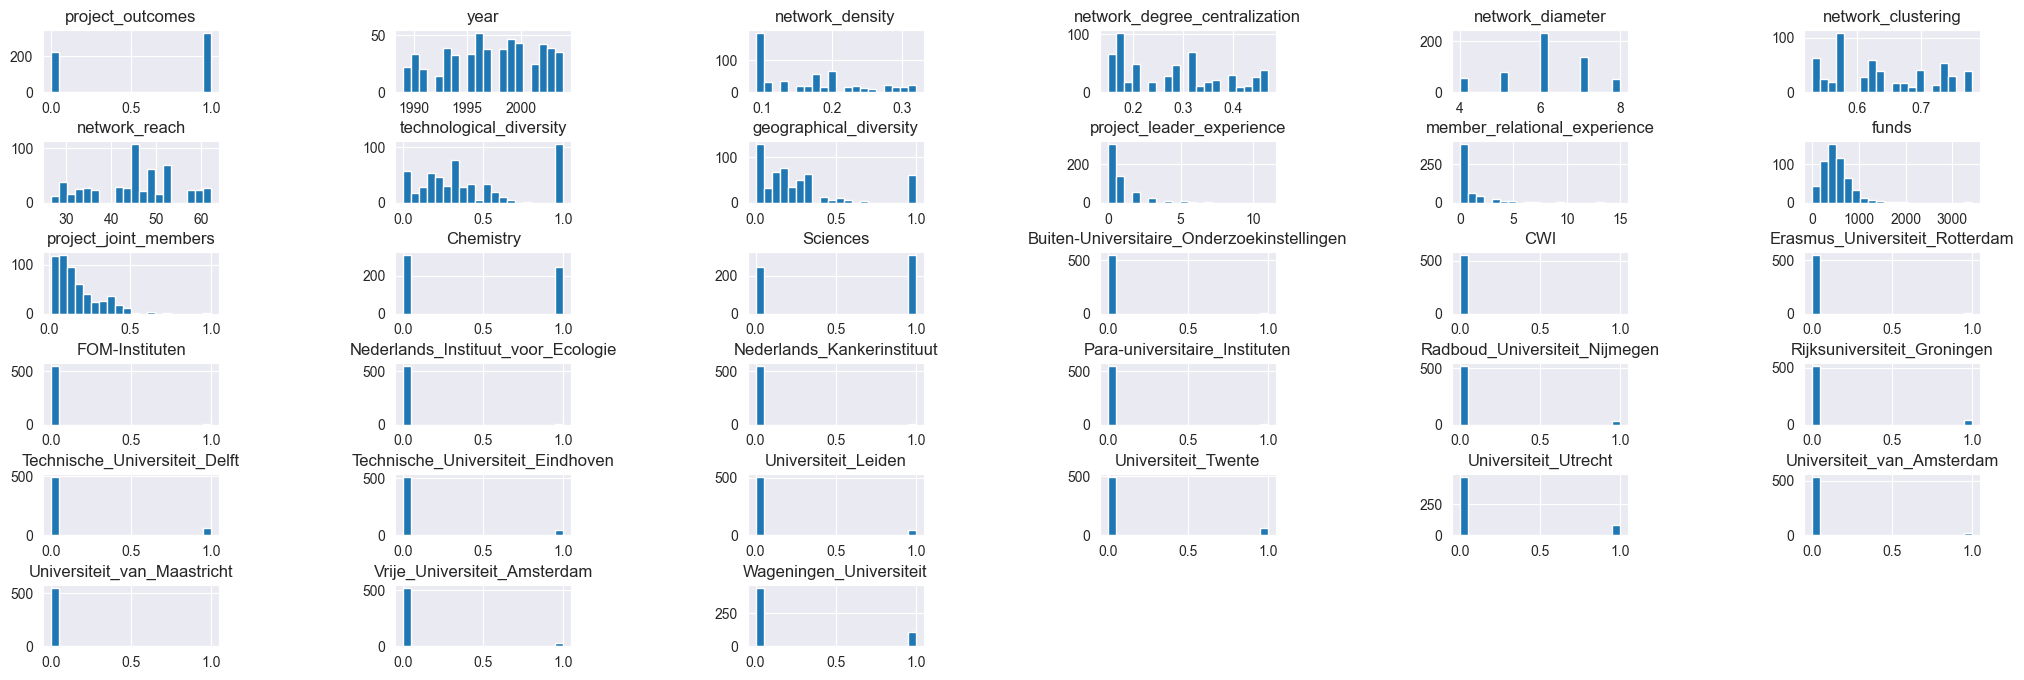

In [8]:
model_df.hist(bins=20, figsize=(25, 8))
plt.subplots_adjust(hspace=0.8, wspace=1)
plt.show()

### Plot correlations

<Axes: >

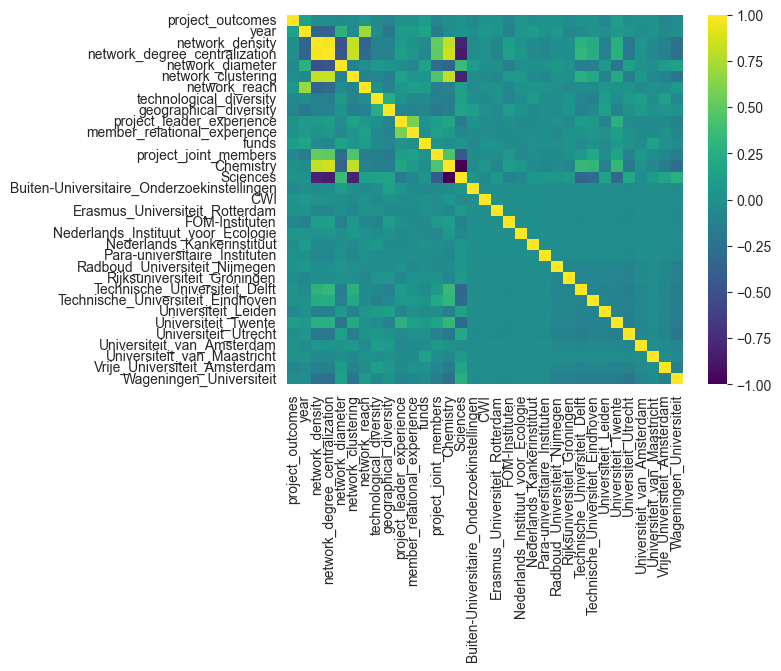

In [9]:
corr = model_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap="viridis")

## 3. Selection and application of a proper analytical technique

As all variables correlate similar with the variable 'project_outcomes, all variables are taken into account when computing the model. As we work with classification models, we will evaluate the models performance by computing the Accuracy, Recall, Precision and F1 score.

In [43]:
#Creating train and test data
#Dummies variables are already there for the categorical variables
columns_to_scale = ['year', 'network_density', 'network_degree_centralization', 'network_diameter', 'network_clustering', 'network_reach', 'technological_diversity', 'geographical_diversity', 'project_leader_experience', 'member_relational_experience', 'funds', 'project_joint_members']

#Independent variable
y = model_df["project_outcomes"]

#Feature
X = model_df.drop("project_outcomes", axis=1)
#Dropping columns to be scaled
X_binary = X.drop(columns=columns_to_scale)

#Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[columns_to_scale])
X_scaled = pd.DataFrame(X_scaled)
#Adding scaled features
X = pd.concat([X_binary, X_scaled], axis=1)

#Renaming scaled columns
X.columns = list(X.columns[:-len(columns_to_scale)]) + columns_to_scale

#Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [49]:
def calculate_ce(model,X,Y):
    # Compute cross entropy
    # Use the model object to predict probabilities per class
    prob = model.predict_proba(X)

    # Multiply the probabilities with Y (0/1 array), and sum along the row axis to obtain the predicted probability of the target
    Y_dummy = pd.get_dummies(Y).to_numpy()
    prob_chosen = np.sum(prob*Y_dummy,axis=1)

    # Take the logarithm
    log_prob_chosen = np.log(prob_chosen)

    # Compute the cross entropy
    cross_entropy = -np.sum(log_prob_chosen)/len(Y)
    return cross_entropy

In [50]:
calculate_ce(log_reg, X_train, y_train)

0.620438322600346

In [ ]:
calculate_ce(log_reg, X_test, y_test)

## 3.1 Logistic Regression

In [48]:
# Training a benchmark model: Logistic regression
log_reg = LogisticRegression(random_state=42, max_iter = 1000)
log_reg.fit(X_train, y_train)
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

# Print the results
print('\t\t Train set\t Test set')
print(f'Accuracy\t {accuracy_score(y_train, y_pred_train):0.3f}\t\t {accuracy_score(y_test, y_pred_test):0.3f}')
print(f'Precision\t {precision_score(y_train, y_pred_train):0.3f}\t\t {precision_score(y_test, y_pred_test):0.3f}')
print(f'Recall\t\t {recall_score(y_train, y_pred_train):0.3f}\t\t {recall_score(y_test, y_pred_test):0.3f}')
print(f'F1 score\t {f1_score(y_train, y_pred_train):0.3f}\t\t {f1_score(y_test, y_pred_test):0.3f}')

		 Train set	 Test set
Accuracy	 0.616		 0.590
Precision	 0.645		 0.598
Recall		 0.828		 0.849
F1 score	 0.725		 0.702


## 3.2 Random Forest

In [12]:
# Define a function for model training, grid search and evaluation

def perform_grid_search_classification(X_train, y_train, X_test, y_test, model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_train = precision_score(y_train, y_pred_train, average='weighted')
    precision_test = precision_score(y_test, y_pred_test, average='weighted')
    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
   
    model_name = best_model.__class__.__name__
    
    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Train Accuracy: {accuracy_train:0.3f}")
    print(f"Test Accuracy: {accuracy_test:0.3f}")
    print(f"Train Precision: {precision_train:0.3f}")
    print(f"Test Precision: {precision_test:0.3f}")
    print(f"Train Recall: {recall_train:0.3f}")
    print(f"Test Recall: {recall_test:0.3f}")
    print(f"Train F1 Score: {f1_train:0.3f}")
    print(f"Test F1 Score: {f1_test:0.3f}")
    
    return best_model, grid_search.cv_results_

In [13]:
# Define a function to generate a visualization from the parameter grid search
def plot_grid_search_results(cv_results):
    results_df = pd.DataFrame(cv_results)
    results_df = results_df.sort_values(by='rank_test_score')

    # Create a new column that contains a string representation of the hyperparameters
    hyperparams_str = results_df['params'].apply(lambda x: '_'.join([f"{k}={v}" for k, v in x.items()]))
    results_df['hyperparams_str'] = hyperparams_str

    # Plot
    plt.figure(figsize=(20, 8))
    plt.bar(results_df['hyperparams_str'], results_df['mean_test_score'], color='skyblue')
    plt.xlabel('Hyperparameter combinations')
    plt.ylabel('Mean Test Score (Accuracy)')
    plt.xticks(rotation=90)
    plt.title('Grid Search Scores for Random Forest')
    plt.tight_layout()
    plt.show()

In [14]:
# Parameter grid for RandomForestClassifier
random_forest_grid = {
    'n_estimators': [20, 50, 100],  # Number of trees in the forest
    #'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_depth': [10, 20, 30],  # Maximum number of levels in each tree
    'min_samples_split': [2, 4, 7],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 4, 7],  # Minimum number of samples required at each leaf node
   # 'bootstrap': [True, False]  # Method for sampling data points (with or without replacement)
}

In [15]:
# Initialize model(s)
rf = RandomForestClassifier(random_state=42)

# Perform grid search for each model
best_rf_model, rf_cv_results = perform_grid_search_classification(X_train, y_train, X_test, y_test, rf, random_forest_grid)

Model: RandomForestClassifier
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Train Accuracy: 0.841
Test Accuracy: 0.613
Train Precision: 0.858
Test Precision: 0.616
Train Recall: 0.841
Test Recall: 0.613
Train F1 Score: 0.833
Test F1 Score: 0.568


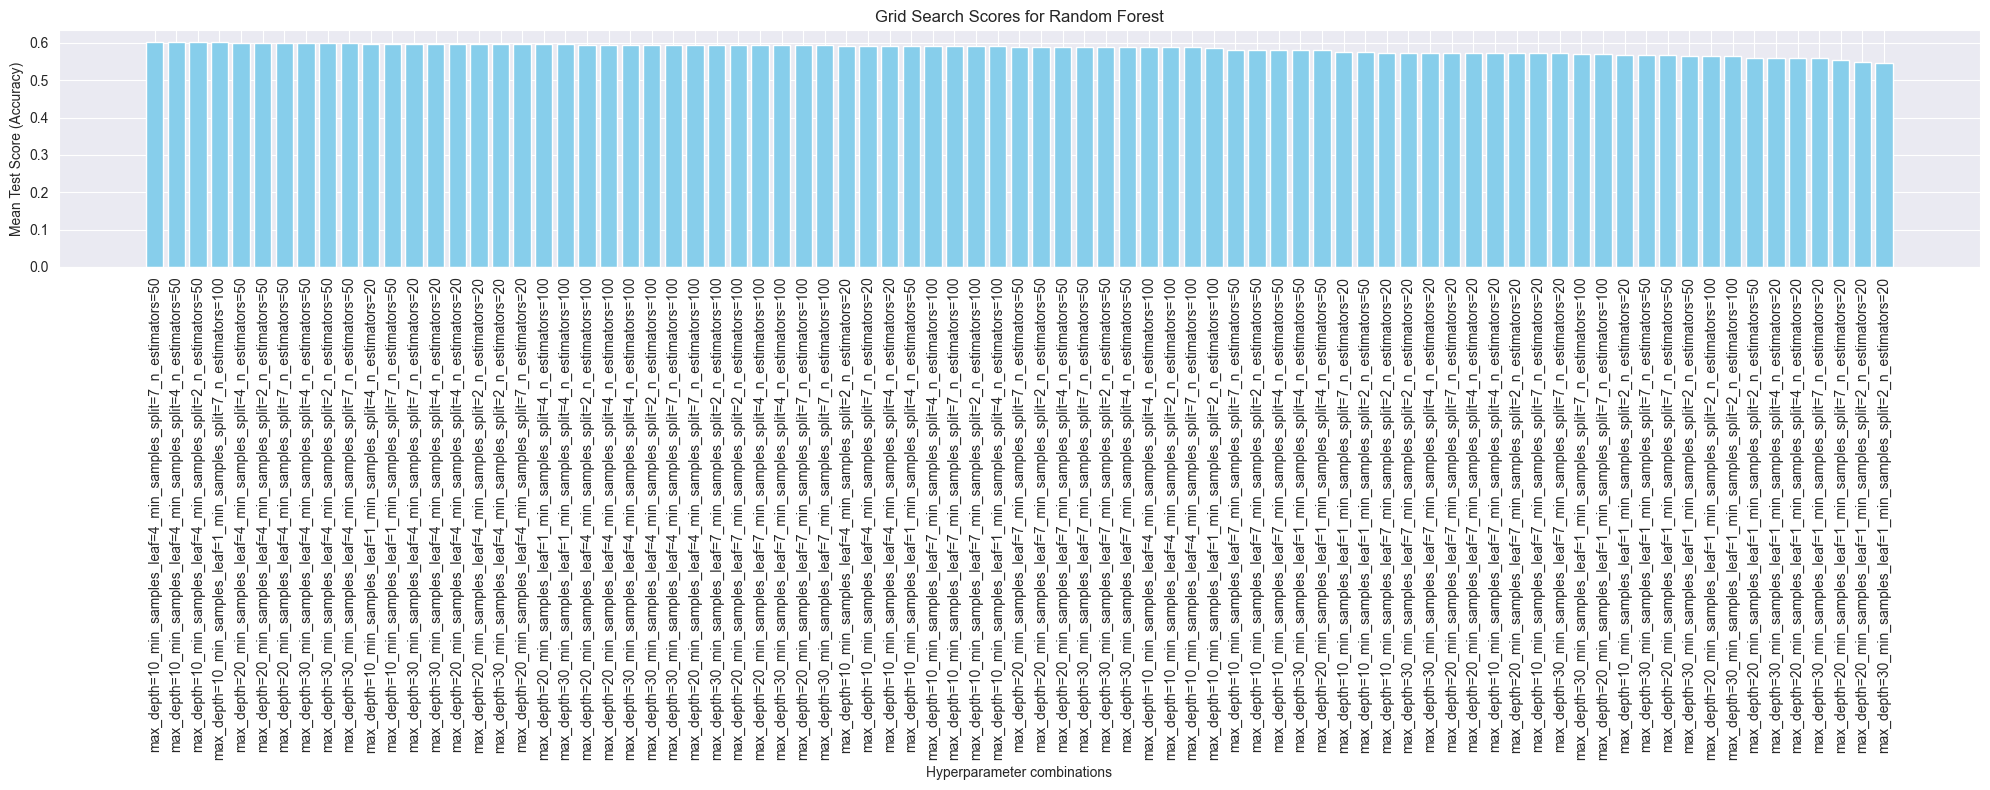

In [16]:
# Call the function to plot the results of hte grid search
plot_grid_search_results(rf_cv_results)